In [8]:
import torch
from diffusers import DDIMScheduler, DDIMInverseScheduler, StableDiffusionDiffEditPipeline

pipeline = StableDiffusionDiffEditPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1",
    torch_dtype=torch.float32,
    safety_checker=None,
    use_safetensors=True,
).to("cpu")
pipeline.scheduler = DDIMScheduler.from_config(pipeline.scheduler.config)
pipeline.inverse_scheduler = DDIMInverseScheduler.from_config(pipeline.scheduler.config)
#pipeline.enable_model_cpu_offload()
pipeline.enable_vae_slicing()

Loading pipeline components...: 100%|████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.04it/s]
The config attributes {'skip_prk_steps': True} were passed to DDIMInverseScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


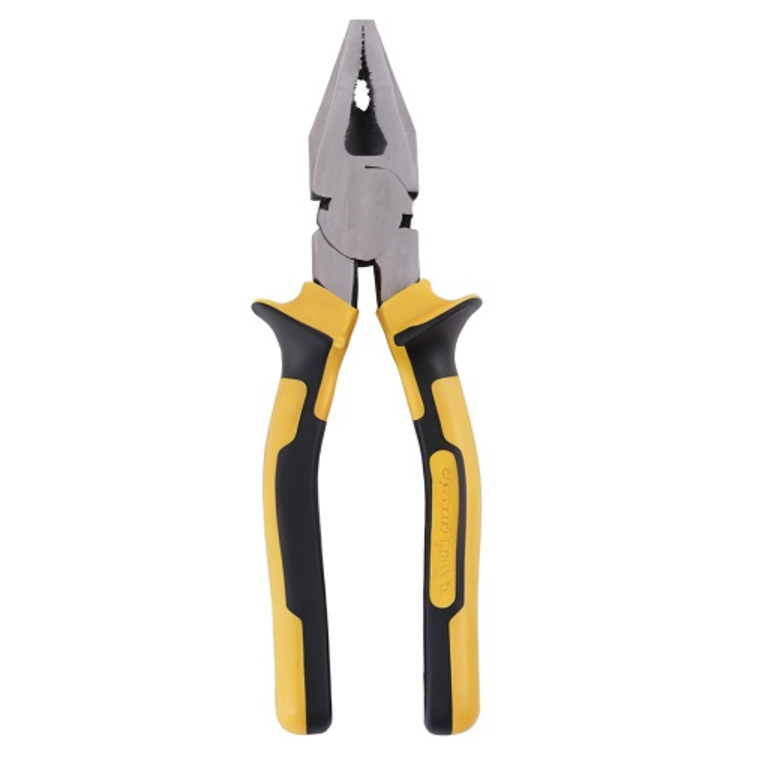

In [11]:
from diffusers.utils import load_image, make_image_grid

img_url = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\generated_datasets\diffusion_models\image_i.png"
raw_image = load_image(img_url).resize((768, 768))
raw_image

In [12]:
from PIL import Image

source_prompt = "plier over white background"
target_prompt = "plier over dry wooden surface"
mask_image = pipeline.generate_mask(
    image=raw_image,
    source_prompt=source_prompt,
    target_prompt=target_prompt)
Image.fromarray((mask_image.squeeze()*255).astype("uint8"), "L").resize((768, 768))

RuntimeError: [enforce fail at ..\c10\core\impl\alloc_cpu.cpp:72] data. DefaultCPUAllocator: not enough memory: you tried to allocate 67947724800 bytes.

In [ ]:
output_image = pipeline(
    prompt=target_prompt,
    mask_image=mask_image,
    image_latents=inv_latents,
    negative_prompt=source_prompt,
).images[0]
mask_image = Image.fromarray((mask_image.squeeze()*255).astype("uint8"), "L").resize((768, 768))
make_image_grid([raw_image, mask_image, output_image], rows=1, cols=3)